In [1]:
import sys
import subprocess
import numpy as np
import pandas as pd
import scipy.io as sio
from core import *
from math import floor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import normalized_mutual_info_score

import matplotlib.pyplot as plt
from scipy.sparse import hstack

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

# Define data folder

In [34]:
data_folder='/home/ofir/Bcells/GitHub/Bit/Data/'

In [35]:
table_summary= pd.DataFrame(columns=['Data','sen_ig','spec_ig' ,'ppv_ig' ,'sen_my' ,'spec_my' ,'ppv_my','size_full','size_ig'])
table_summary_my= pd.DataFrame(columns=['Data','sen_short','sen_mid','sen_long','spec_short','spec_mid','spec_long','ppv_short','ppv_mid','ppv_long'])
table_summary_clones= pd.DataFrame(columns=['Data','num_c_my','num_m_my' ,'num_ac_my' ,'num_acm_my' ,'num_c_ig','num_m_ig'])
table_a= pd.DataFrame(columns=['clone','table','ig'])

In [36]:
for i in range (1,21):
    table_a=table_a.append({'clone':data_folder+'clone_dataMS2_vv'+str(i)+'.csv','table': data_folder+'sim_dataMS2_vv'+str(i)+'.csv'  }, ignore_index=True)

In [37]:
bins=np.arange(0,0.6,0.005)

In [39]:
i=0

In [42]:
W_l=150             
M_L=2000000
for i in range(0,20):
   # table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])



    clone_list=table_clone.SEED_SEQUENCE_ID[:]

  
    
    
    table_last=truncate_sequence_v(table_full.SEQUENCE,W_l)
    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=True)
    tf_idf_matrix_full= vectorizer.fit_transform(table_last.end)
    matches_fast_s= awesome_cossim_top(tf_idf_matrix_full, tf_idf_matrix_full.transpose(), 800, 0.5)
    dist2nearestcosine=compute_dist2nearest(matches_fast_s)

    labels_list,cloned_list_full_f=clone_inference(clone_list,clone_list)
    thresh_cosine_o=np.percentile(dist2nearestcosine[labels_list==0], 1)
    clusters_cosine_full_s=cluster_from_matches(matches_fast_s,thresh_cosine_o)

    labels_list_short,cloned_list_full_short=clone_inference(clone_list,clusters_cosine_full_s)

    sensitivity_my=sum(cloned_list_full_short[np.where(labels_list_short==1)]==1)/sum(labels_list_short==1)
    print('sen=',sensitivity_my)
    specificity_my=sum(cloned_list_full_short[np.where(labels_list_short==0)]==0)/sum(labels_list_short==0)
    print('specificity=',specificity_my)
    ppv_my=sum(labels_list_short[np.where(cloned_list_full_short==1)]==1)/sum(cloned_list_full_short==1)
    print('PPV=',ppv_my)
    
    #table_summary=table_summary.append({'Data': i,'sen_ig': sensitivity_my ,'spec_ig': specificity_my ,'ppv_ig': ppv_my ,'sen_my': sensitivity_my ,'spec_my': specificity_my ,'ppv_my': ppv_my,'size_full':table_full.shape[0],'size_ig':clone_list_short.shape[0]}, ignore_index=True)
    table_summary=table_summary.append({'Data': i,'sen_my': sensitivity_my ,'spec_my': specificity_my ,'ppv_my': ppv_my,'size_full':table_full.shape[0]}, ignore_index=True)
  

sen= 0.9860288491512456
specificity= 0.9899716847569608
PPV= 0.9975630035264772
sen= 0.986323521350655
specificity= 0.9900107028184089
PPV= 0.9976712594605085
sen= 0.9858691218460462
specificity= 0.9900367690665401
PPV= 0.9975236579110286
sen= 0.9826634898739733
specificity= 0.9902647512762673
PPV= 0.9973907786298406
sen= 0.985680062447848
specificity= 0.9899605593402653
PPV= 0.9977113587445168
sen= 0.9868421052631579
specificity= 0.989950342870655
PPV= 0.9976542017386505
sen= 0.9826903896271034
specificity= 0.9900379506641366
PPV= 0.9972573219708101
sen= 0.9828641747423473
specificity= 0.9899205502193763
PPV= 0.997346486435863
sen= 0.9856548469229336
specificity= 0.9900059488399762
PPV= 0.9973608143772779
sen= 0.9857867438461759
specificity= 0.9899157669948986
PPV= 0.9975352316882213
sen= 0.9853675945753033
specificity= 0.9901983939537081
PPV= 0.9975011290079783
sen= 0.9850855348635773
specificity= 0.9899581589958159
PPV= 0.9976971790443293
sen= 0.98365058285377
specificity= 0.9900190

In [44]:
table_summary_no_idf= pd.DataFrame(columns=['Data','sen_ig','spec_ig' ,'ppv_ig' ,'sen_my' ,'spec_my' ,'ppv_my','size_full','size_ig'])

In [45]:
W_l=150             
M_L=2000000
for i in range(0,20):
   # table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])



    clone_list=table_clone.SEED_SEQUENCE_ID[:]

  
    
    
    table_last=truncate_sequence_v(table_full.SEQUENCE,W_l)
    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=False)
    tf_idf_matrix_full= vectorizer.fit_transform(table_last.end)
    matches_fast_s= awesome_cossim_top(tf_idf_matrix_full, tf_idf_matrix_full.transpose(), 800, 0.5)
    dist2nearestcosine=compute_dist2nearest(matches_fast_s)

    labels_list,cloned_list_full_f=clone_inference(clone_list,clone_list)
    thresh_cosine_o=np.percentile(dist2nearestcosine[labels_list==0], 1)
    clusters_cosine_full_s=cluster_from_matches(matches_fast_s,thresh_cosine_o)

    labels_list_short,cloned_list_full_short=clone_inference(clone_list,clusters_cosine_full_s)

    sensitivity_my=sum(cloned_list_full_short[np.where(labels_list_short==1)]==1)/sum(labels_list_short==1)
    print('sen=',sensitivity_my)
    specificity_my=sum(cloned_list_full_short[np.where(labels_list_short==0)]==0)/sum(labels_list_short==0)
    print('specificity=',specificity_my)
    ppv_my=sum(labels_list_short[np.where(cloned_list_full_short==1)]==1)/sum(cloned_list_full_short==1)
    print('PPV=',ppv_my)
    
  
    table_summary_no_idf=table_summary_no_idf.append({'Data': i,'sen_my': sensitivity_my ,'spec_my': specificity_my ,'ppv_my': ppv_my,'size_full':table_full.shape[0]}, ignore_index=True)
  

sen= 0.9721993935443648
specificity= 0.9900896649362907
PPV= 0.9975574294853155
sen= 0.9733596447952639
specificity= 0.9901296230229516
PPV= 0.9976683428378796
sen= 0.9703397237923198
specificity= 0.9900367690665401
PPV= 0.9974841260333054
sen= 0.9670512257821807
specificity= 0.9900273061854447
PPV= 0.997284277908894
sen= 0.9737557535463379
specificity= 0.9900800764909764
PPV= 0.9977109131525966
sen= 0.9736842105263158
specificity= 0.9900685741310002
PPV= 0.9976504810919669
sen= 0.968340786975966
specificity= 0.9899193548387096
PPV= 0.997183751905109
sen= 0.9676972773419474
specificity= 0.9900391319815013
PPV= 0.99733663083801
sen= 0.9709681425821276
specificity= 0.9902439024390244
PPV= 0.9973846202915192
sen= 0.9735507350202023
specificity= 0.9900344050302528
PPV= 0.9975336191203241
sen= 0.9715084463478467
specificity= 0.9899622106754842
PPV= 0.997404659399713
sen= 0.9728508012126462
specificity= 0.9899581589958159
PPV= 0.9976682859125607
sen= 0.9698096502877379
specificity= 0.9900190

In [46]:
table_summary_full= pd.DataFrame(columns=['Data','sen_ig','spec_ig' ,'ppv_ig' ,'sen_my' ,'spec_my' ,'ppv_my','size_full','size_ig'])

In [47]:
        
M_L=2000000
for i in range(0,20):
   # table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])



    clone_list=table_clone.SEED_SEQUENCE_ID[:]

  
    

    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=True)
    tf_idf_matrix_full= vectorizer.fit_transform(table_full.SEQUENCE)
    matches_fast_s= awesome_cossim_top(tf_idf_matrix_full, tf_idf_matrix_full.transpose(), 800, 0.5)
    dist2nearestcosine=compute_dist2nearest(matches_fast_s)

    labels_list,cloned_list_full_f=clone_inference(clone_list,clone_list)
    thresh_cosine_o=np.percentile(dist2nearestcosine[labels_list==0], 1)
    clusters_cosine_full_s=cluster_from_matches(matches_fast_s,thresh_cosine_o)

    labels_list_short,cloned_list_full_short=clone_inference(clone_list,clusters_cosine_full_s)

    sensitivity_my=sum(cloned_list_full_short[np.where(labels_list_short==1)]==1)/sum(labels_list_short==1)
    print('sen=',sensitivity_my)
    specificity_my=sum(cloned_list_full_short[np.where(labels_list_short==0)]==0)/sum(labels_list_short==0)
    print('specificity=',specificity_my)
    ppv_my=sum(labels_list_short[np.where(cloned_list_full_short==1)]==1)/sum(cloned_list_full_short==1)
    print('PPV=',ppv_my)
    
   
    table_summary_full=table_summary_full.append({'Data': i,'sen_my': sensitivity_my ,'spec_my': specificity_my ,'ppv_my': ppv_my,'size_full':table_full.shape[0]}, ignore_index=True)
  

sen= 0.9243347408394026
specificity= 0.9899716847569608
PPV= 0.9974007705950706
sen= 0.9295620237899468
specificity= 0.9900107028184089
PPV= 0.9975294117647059
sen= 0.9276848668492512
specificity= 0.9899181591744751
PPV= 0.997337509788567
sen= 0.9218132798294564
specificity= 0.9900273061854447
PPV= 0.9971513836136734
sen= 0.9277273828429922
specificity= 0.9899605593402653
PPV= 0.9975687409551375
sen= 0.9300611487224285
specificity= 0.9900685741310002
PPV= 0.9975405516191369
sen= 0.9211737074096715
specificity= 0.9899193548387096
PPV= 0.9970399777127734
sen= 0.920504537763421
specificity= 0.9902762955057512
PPV= 0.9972669399726694
sen= 0.9268459293299385
specificity= 0.9900059488399762
PPV= 0.9971938264181198
sen= 0.930022638049116
specificity= 0.9899157669948986
PPV= 0.9973878303626306
sen= 0.9276707113966215
specificity= 0.9900803023145961
PPV= 0.9973142345568488
sen= 0.9327631009094847
specificity= 0.9899581589958159
PPV= 0.9975683186660491
sen= 0.9255127637597758
specificity= 0.9899

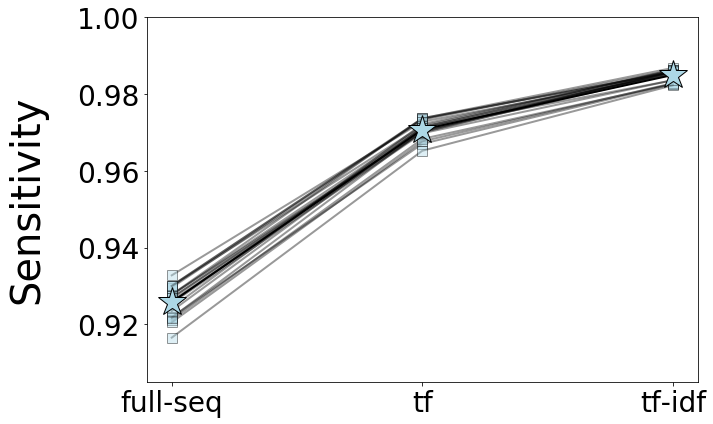

In [50]:
import matplotlib.pyplot as plt
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
for i in range(0,20):

        plt.plot(['full-seq','tf','tf-idf' ],[table_summary_full.sen_my[i],table_summary_no_idf.sen_my[i],table_summary.sen_my[i]],marker='s',markersize=10,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k',alpha=0.4)
      
        ax.xaxis.label.set_fontsize(40)
        ax.yaxis.label.set_fontsize(40)
        ax.tick_params(labelsize=28)
        plt.ylabel('Sensitivity',labelpad=30)
        ax.set_ylim([0.905,1.0002])
        
plt.plot(['full-seq','tf','tf-idf' ],[np.mean(table_summary_full.sen_my[:]),np.mean(table_summary_no_idf.sen_my[:]),np.mean(table_summary.sen_my[:])],marker='*',markersize=30,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k')
#plt.xlabel(labelpad=20)
plt.tight_layout()
plt.savefig('Figs/per_all_per_idf_fin')
